## **Rock VS Mine Prediction**
Using Logistic Regression, KNN, SVM and Decision Tree

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AD006/Rock-VS-Mine-Prediction/main/Sonar_data.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(208, 61)

In [5]:
#Descriptive statistics 
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

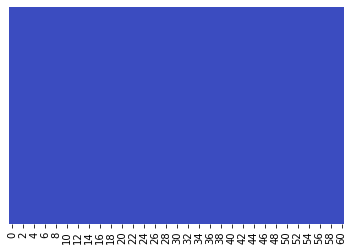

In [7]:
#Checking Null Values using Heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

***Note*** - There is no Null Values

In [8]:
#Checking how many of Mines and Rocks present in the dataset.
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

M=Mine & R=Rock. The dataset looks balanced

In [9]:
#Doing Encoding for target value.
def target(text):
  if 'R' in text:
    return 0
  elif 'M' in text:
    return 1

df[60]=df[60].apply(target)

In [10]:
#Now seprating Data and Labels.
X=df.drop(columns=60, axis=1)
Y=df[60]

In [11]:
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [12]:
X.head() #Independent data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [13]:
Y.head() #Dependent data

0    0
1    0
2    0
3    0
4    0
Name: 60, dtype: int64

In [14]:
#Lets split the data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=1)

In [15]:
print(X_train.shape, X_test.shape)

(166, 60) (42, 60)


**Model Evaluation**

In [16]:
def models(X_train, Y_train):

  from sklearn.linear_model import LogisticRegression
  lr=LogisticRegression(random_state=0)
  lr.fit(X_train, Y_train)

  from sklearn.neighbors import KNeighborsClassifier
  knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
  knn.fit(X_train, Y_train)

  from sklearn.svm import SVC
  svc_lin=SVC(kernel='linear', random_state=0)
  svc_lin.fit(X_train, Y_train)

  from sklearn.svm import SVC
  svc_rbf=SVC(kernel='rbf', random_state=0)
  svc_rbf.fit(X_train, Y_train)

  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy',random_state = 0)
  tree.fit(X_train,Y_train)

  print('Checking which Algorithm has best Accuracy Score :')
  print("")
  print("Logistic Regression Accuracy       ", lr.score(X_train, Y_train))
  print("KNN Accuracy                       ", knn.score(X_train, Y_train))
  print("SVM Linear Accuracy                ", svc_lin.score(X_train, Y_train))
  print("SVM RBF Accuracy                   ", svc_rbf.score(X_train, Y_train))
  print("Decision Tree Accuracy             ", tree.score(X_train, Y_train))

  return lr, knn, svc_lin, svc_rbf, tree

In [17]:
model=models(X_train, Y_train)

Checking which Algorithm has best Accuracy Score :

Logistic Regression Accuracy        0.8313253012048193
KNN Accuracy                        0.8674698795180723
SVM Linear Accuracy                 0.8493975903614458
SVM RBF Accuracy                    0.8855421686746988
Decision Tree Accuracy              1.0


**NOTE:** We applied 4 Machine Learning Algorithms but we got overfitting in one algorithm i.e Decision Tree Algorithm so we do not consider it. **Support Vector Machine(RBF)** Agorithm gives best accuracy.